In [43]:
from scipy import ndimage as ndi
from sklearn.cluster import MeanShift
import numpy as np
from skimage import io, img_as_float
import matplotlib.pyplot as plt

def findAtomicColumn(image,atomic_size=10,threshold=0.2):
    dilation_size=atomic_size
    mean_shift_band_width=atomic_size
    dilation = ndi.maximum_filter(image, size=dilation_size, mode='constant')
    coords_max = np.asarray(np.nonzero( (image == dilation) * (image > threshold) )).T
    clusters = MeanShift(bandwidth=mean_shift_band_width).fit(coords_max)
    positions = clusters.cluster_centers_
    print ("%d atomic columns found" % (len(positions)))
    return coords_max, positions


def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [44]:
image = img_as_float(io.imread('HAADF_byungchul.png'))
image = rgb2gray(image)

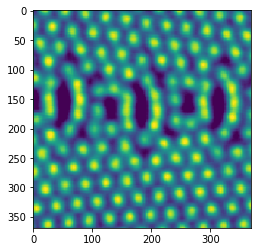

In [45]:
plt.imshow(image)

In [60]:
coords_max, positions = findAtomicColumn(image,atomic_size=15,threshold=0.6)

144 atomic columns found


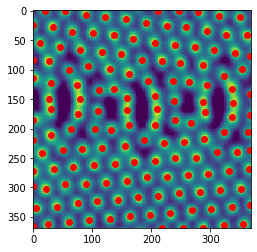

In [61]:
plt.imshow(image)
#plt.plot(coords_max[:,1],coords_max[:,0],'ro',markersize=1)
plt.plot(positions[:,1],positions[:,0],'ro')